<a href="https://colab.research.google.com/github/Pushpit07/Logistic_Regression/blob/main/Custom_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [45]:
X, y = make_blobs(centers=2, random_state=0)

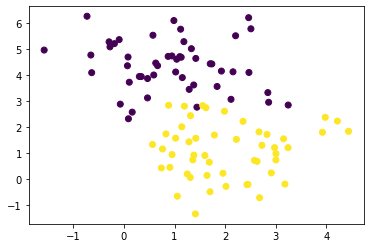

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [47]:
class CustomLogisticRegression:
  # constructor
  def __init__(self, lr=0.01, iters=20):
    self._lr = lr
    self._iters = iters

  # fit function, where training will happen
  def fit(self, X, y):
    self._y = y.reshape(-1, 1)
    X_mod = np.hstack([np.ones([len(X), 1]), X])
    self._X = X_mod

    self._theta = np.zeros([X_mod.shape[1], 1])

    err = []
    for i in range(self._iters):
      err.append(self.error())
      self.gradient_ascend()

    self.theta_ = self._theta
    return err
  
  def gradient_ascend(self):
    delta_theta = self.gradient()
    self._theta -= delta_theta
  
  def gradient(self):
    yh = self.hypothesis(self._X)
    ya = self._y
    diff = -(ya - yh) # (100, 1) # here i have taken -ve of log likelyhood, hence gradient descent            
    return np.dot(self._X.T, diff) * self._lr # (3,1) # for every feature, sum(diff * ith example)

  def hypothesis(self, X):
    prod = np.dot(X, self._theta)
    # X.shape is (100, 3)
    # Shape of theta is (3, 1)
    # prod.shape is (100, 1)
    return 1/(1 + np.exp(-prod))

  def error(self):
    yh = self.hypothesis(self._X)
    ya = self._y
    ll = ya * np.log(yh) + (1-ya)*np.log(1-yh)
    return -np.mean(ll)

  def predict(self, X):
    X_mod = np.hstack([np.ones([len(X), 1]), X])
    yh = self.hypothesis(X_mod)
    return (yh > .5).astype(int).flatten()

  def score(self, X, y):
    yp = self.predict(X)
    return np.mean(yp==y)

  def confusion_matrix(self, X, y):
    yp = self.predict(X)
    
    tp = np.mean((y==1) & (yp==1))
    tn = np.mean((y==0) & (yp==0))
    fp = np.mean((y==0) & (yp==1))
    fn = np.mean((y==1) & (yp==0))
    
    return np.array([[tp, fp], [fn, tn]])

In [48]:
model = CustomLogisticRegression()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [50]:
err = model.fit(X_train, y_train)

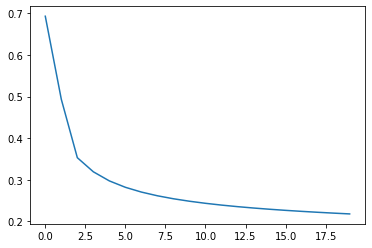

In [51]:
plt.plot(err)

In [52]:
model.theta_

array([[ 0.71194608],
       [ 1.17525229],
       [-1.1967875 ]])

In [53]:
model.score(X_test, y_test)

0.8787878787878788